# **Credit  Card Clustering**

### About Dataset 
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

`CUST_ID` : Identification of Credit Card holder (Categorical)

`BALANCE` : Balance amount left in their account to make purchases 

`BALANCE_FREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

`PURCHASES` : Amount of purchases made from account

`ONEOFF_PURCHASES` : Maximum purchase amount done in one-go

`INSTALLMENTS_PURCHASES` : Amount of purchase done in installment

`CASH_ADVANCE` : Cash in advance given by the user

`PURCHASES_FREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

`ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

`PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

`CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid

`CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced"

`PURCHASES_TRX` : Numbe of purchase transactions made

`CREDIT_LIMIT` : Limit of Credit Card for user

`PAYMENTS` : Amount of Payment done by user

`MINIMUM_PAYMENTS` : Minimum amount of payments made by user

`PRCFULLPAYMENT` : Percent of full payment paid by user

`TENURE` : Tenure of credit card service for user


# <h3>Importing libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
import pylab as pl
import numpy as np
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<h3>Loading the dataset</h3>

In [2]:
path = "CC GENERAL.csv"
df = pd.read_csv(path)
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
df.drop(["CUST_ID"],axis = 1, inplace = True)

<h3>Basic insights of dataset</h3>

In [4]:
df.shape

(8950, 17)

In [5]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing:np.nan'] = (df.isnull()).sum()
    summary_df['Missing:None'] = (df == "None").sum()
    summary_df['total'] = summary_df['Missing:np.nan'] + summary_df['Missing:None']
    summary_df['Percent'] = 100*summary_df['total']/len(df)
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df.sort_values(ascending = False, by = 'Percent')

summary(df).style.background_gradient(cmap='Blues')

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# Define categoric and numeric veriables
df_uniques = df.nunique()
categorical_variables = list(df_uniques[df_uniques <=10].index)
numeric_variables = list(set(df.columns) - set(categorical_variables))
print("Categorical variables:", categorical_variables)
print("  "*15)
print("Numeric variables:", numeric_variables)

Categorical variables: ['TENURE']
                              
Numeric variables: ['CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 'BALANCE', 'MINIMUM_PAYMENTS', 'PURCHASES', 'ONEOFF_PURCHASES', 'CREDIT_LIMIT', 'BALANCE_FREQUENCY', 'PAYMENTS', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY', 'PURCHASES_TRX']


### Outlier detection

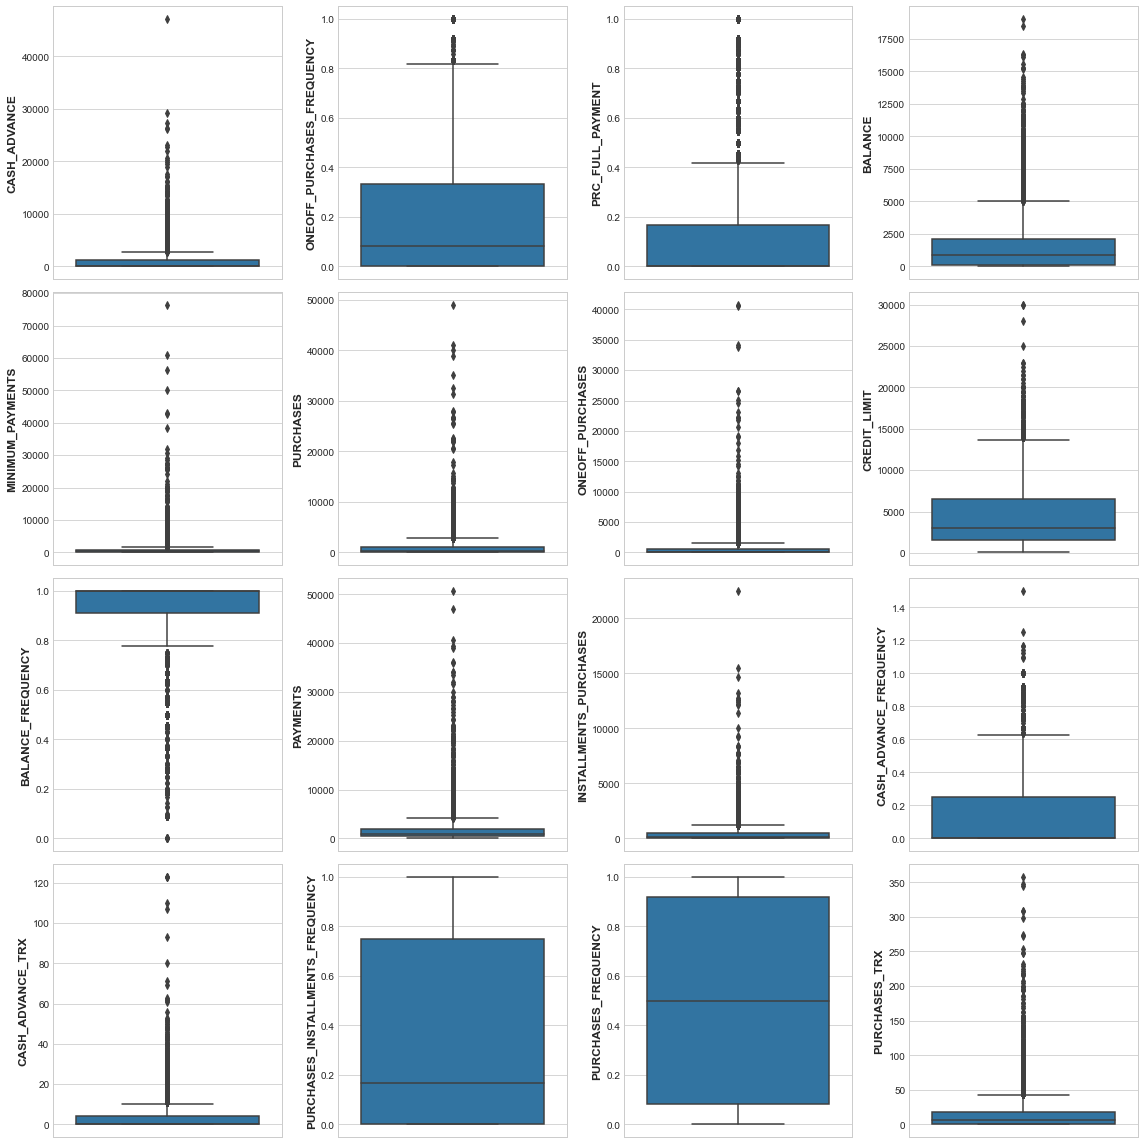

In [10]:
numeric = df[numeric_variables]
# boxplots of numerical features for outlier detection

fig = plt.figure(figsize=(16,16))
for i in range(len(numeric.columns)):
    fig.add_subplot(4, 4, i+1)
    sns.boxplot(y=numeric.iloc[:,i])
plt.tight_layout()
plt.show()

In [11]:
df.shape

(8636, 17)

### Dealing with outliers

In [12]:
for col in df.columns:
    Q1 = df[col].quantile(0.1)
    Q3 = df[col].quantile(0.9)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
    
# Removing outliers statistically


In [13]:
df.shape

(7324, 17)

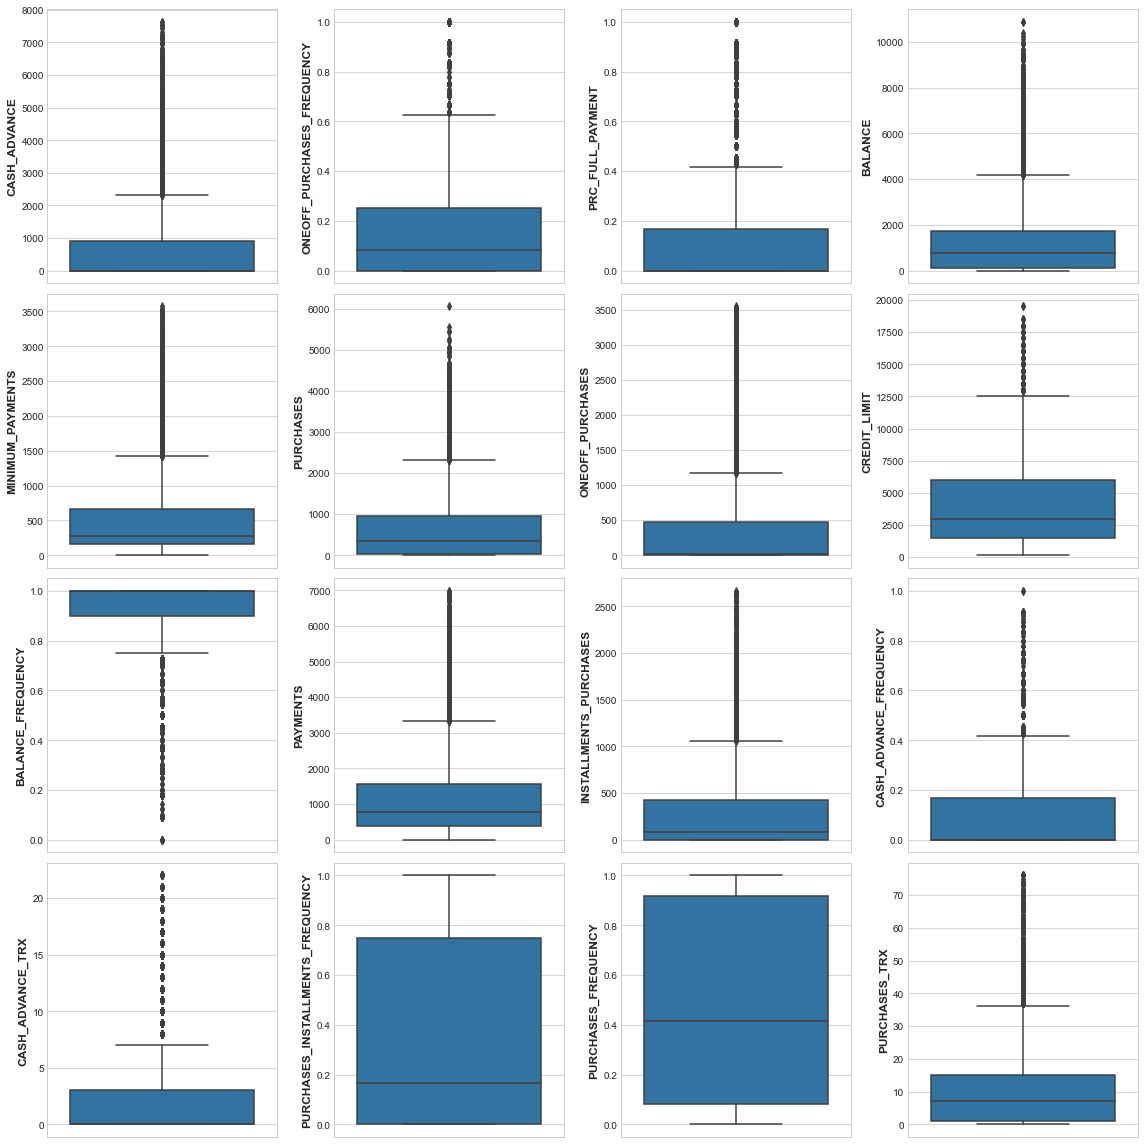

In [14]:
numeric = df[numeric_variables]
# boxplots of numerical features for outlier detection

fig = plt.figure(figsize=(16,16))
for i in range(len(numeric.columns)):
    fig.add_subplot(4, 4, i+1)
    sns.boxplot(y=numeric.iloc[:,i])
plt.tight_layout()
plt.show()

In [ ]:
# Note that the outliers have not been removed totally, but have been reduced

## Data preprocessing - scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns = df.columns)
df.describe().round(3).T

count  mean  std    min    25%    50%  \
BALANCE                           7324.0   0.0  1.0 -0.790 -0.721 -0.316   
BALANCE_FREQUENCY                 7324.0   0.0  1.0 -4.136  0.055  0.521   
PURCHASES                         7324.0   0.0  1.0 -0.773 -0.727 -0.379   
ONEOFF_PURCHASES                  7324.0  -0.0  1.0 -0.574 -0.574 -0.543   
INSTALLMENTS_PURCHASES            7324.0   0.0  1.0 -0.646 -0.646 -0.471   
CASH_ADVANCE                      7324.0   0.0  1.0 -0.552 -0.552 -0.552   
PURCHASES_FREQUENCY               7324.0  -0.0  1.0 -1.208 -0.997 -0.153   
ONEOFF_PURCHASES_FREQUENCY        7324.0  -0.0  1.0 -0.655 -0.655 -0.355   
PURCHASES_INSTALLMENTS_FREQUENCY  7324.0  -0.0  1.0 -0.901 -0.901 -0.473   
CASH_ADVANCE_FREQUENCY            7324.0  -0.0  1.0 -0.685 -0.685 -0.685   
CASH_ADVANCE_TRX                  7324.0  -0.0  1.0 -0.598 -0.598 -0.598   
PURCHASES_TRX                     7324.0  -0.0  1.0 -0.820 -0.746 -0.302   
CREDIT_LIMIT                      7324.0   0.0  1.0 -1.232 -0.804 -0.329   
PAYMENTS                          7324.0  -0.0  1.0 -1.018 -0.682 -0.348   
MINIMUM_PAYMENTS                  7324.0  -0.0  1.0 -0.879 -0.607 -0.430   
PRC_FULL_PAYMENT                  7324.0  -0.0  1.0 -0.531 -0.531 -0.531   
TENURE                            7324.0   0.0  1.0 -4.338  0.342  0.342   

                                    75%    max  
BALANCE                           0.268  5.836  
BALANCE_FREQUENCY                 0.521  0.521  
PURCHASES                         0.329  6.250  
ONEOFF_PURCHASES                  0.155  4.952  
INSTALLMENTS_PURCHASES            0.273  5.128  
CASH_ADVANCE                      0.181  5.497  
PURCHASES_FREQUENCY               1.113  1.325  
ONEOFF_PURCHASES_FREQUENCY        0.244  2.941  
PURCHASES_INSTALLMENTS_FREQUENCY  1.025  1.667  
CASH_ADVANCE_FREQUENCY            0.279  5.099  
CASH_ADVANCE_TRX                  0.142  4.831  
PURCHASES_TRX                     0.291  4.809  
CREDIT_LIMIT                      0.622  4.901  
PAYMENTS                          0.325  4.980  
MINIMUM_PAYMENTS                  0.225  5.041  
PRC_FULL_PAYMENT                  0.041  2.902  
TENURE                            0.342  0.342

## K-means clustering

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

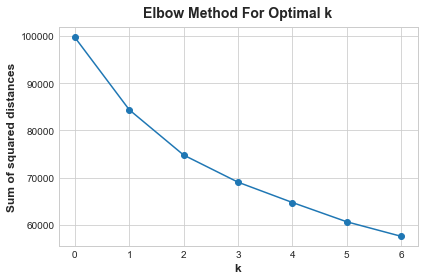

In [20]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.plot(ssd, marker = "o")
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show();

In [21]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.20534471373135538
For n_clusters=3, the silhouette score is 0.2146960220404538
For n_clusters=4, the silhouette score is 0.1919981244195446
For n_clusters=5, the silhouette score is 0.19138477044037747
For n_clusters=6, the silhouette score is 0.20086319715571702
For n_clusters=7, the silhouette score is 0.20675447237425382
For n_clusters=8, the silhouette score is 0.20287094744179066


In [22]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
labels =kmeans.fit_predict(df)


In [23]:
# assign the label
df['Cluster'] = kmeans.labels_
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.764680          -0.325836  -0.662710         -0.574073   
1  1.162258           0.097520  -0.773307         -0.574073   
2  0.731155           0.520876   0.123031          0.628687   
3 -0.291221           0.520876  -0.754758         -0.549183   
4  0.313461           0.520876   0.772368         -0.574073   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.439389     -0.551908            -0.785832   
1               -0.645999      4.552342            -1.207901   
2               -0.645999     -0.551908             1.324506   
3               -0.645999     -0.551908            -0.996868   
4                2.241526     -0.551908             0.480371   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.654987                         -0.687441   
1                   -0.654987                         -0.901500   
2                    2.940610                         -0.901500   
3                   -0.355355                         -0.901500   
4                   -0.654987                          0.596914   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.685202         -0.598167      -0.672221     -0.962720   
1                0.760916          0.388984      -0.820357      0.939082   
2               -0.685202         -0.598167       0.068455      1.097565   
3               -0.685202         -0.598167      -0.746289     -0.899327   
4               -0.685202         -0.598167      -0.227816     -0.709147   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  Cluster  
0 -0.844402         -0.648097         -0.530656  0.341859        0  
1  2.507294          0.897755          0.232195  0.341859        2  
2 -0.483337          0.160226         -0.530656  0.341859        1  
3 -0.434995         -0.473628         -0.530656  0.341859        0  
4  0.185065          3.109911         -0.530656  0.341859        0

### numeric_variables by cluster

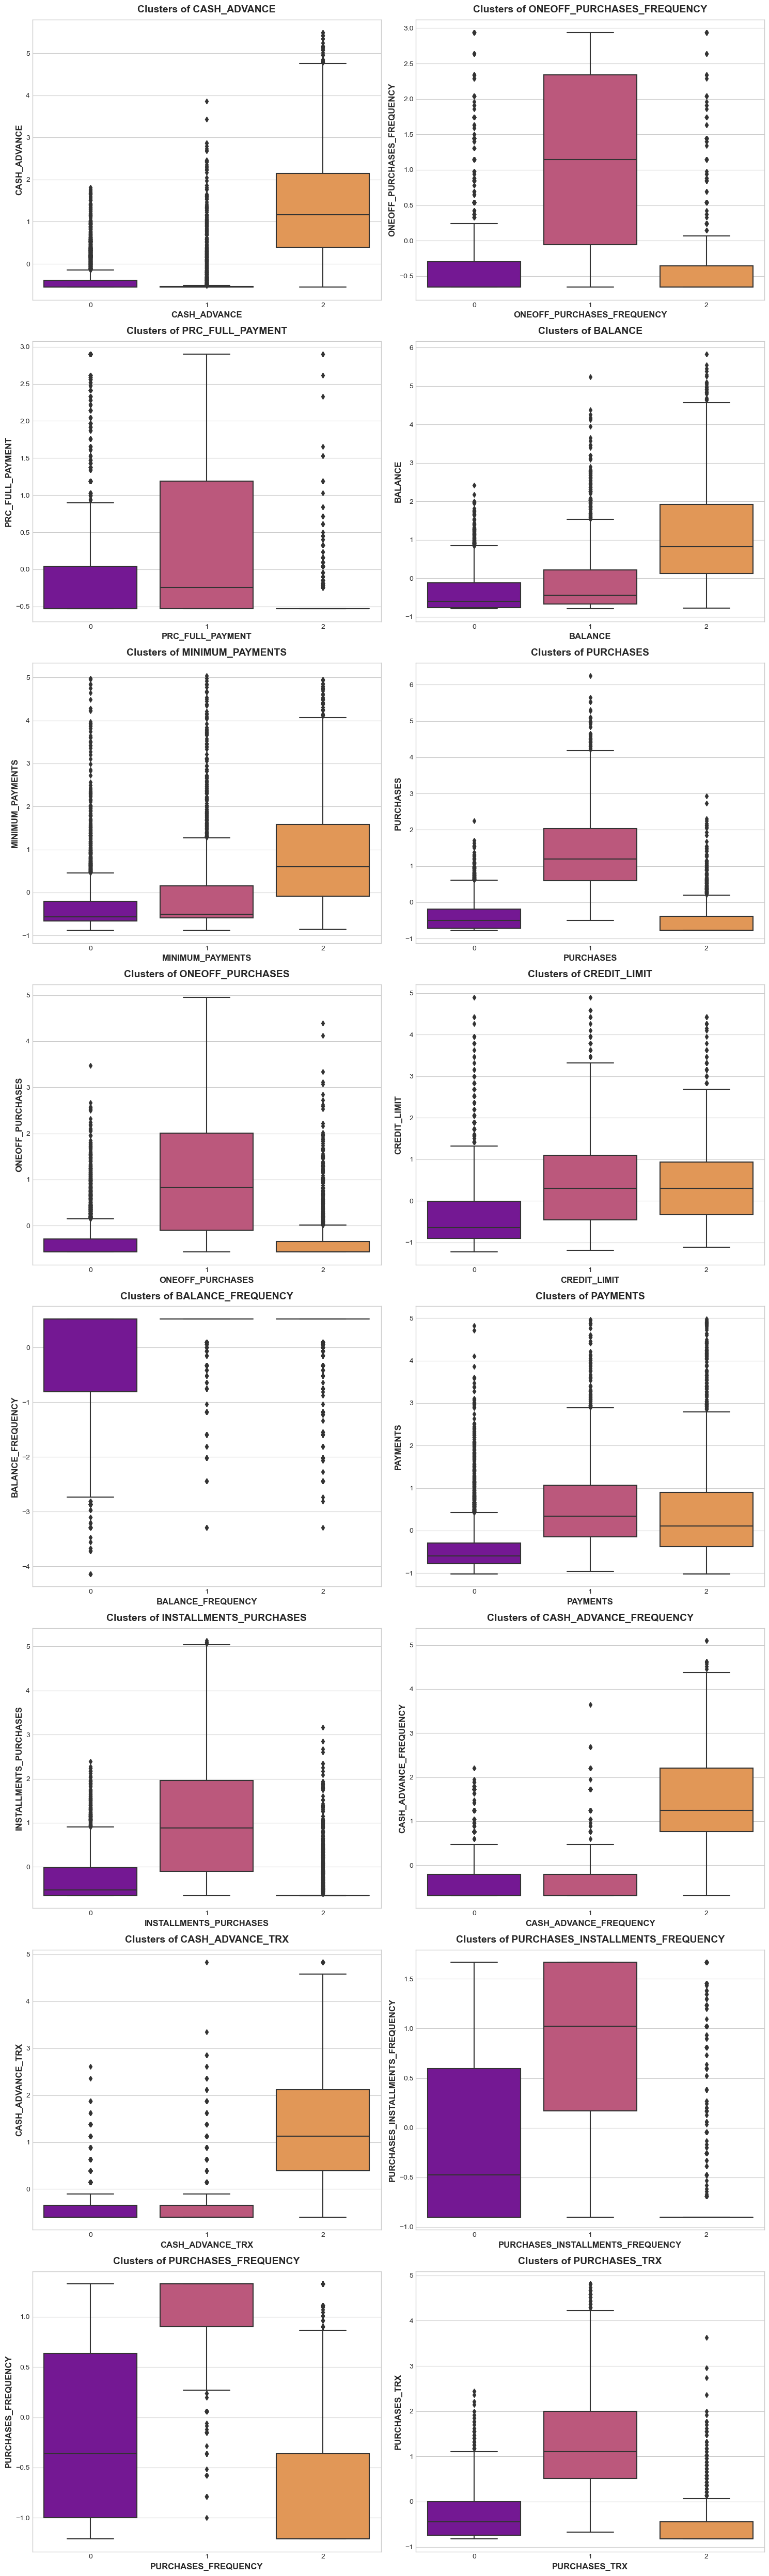

In [24]:
num = df[numeric_variables]
def plot_box(df, cols, col_x = 'Cluster' ):
    fig, axes = plt.subplots(8, 2, figsize=(15, 50), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot( col_x, col,ax = axes[i], data = df,  palette='plasma')
        axes[i].set_title("Clusters of " + col)
        axes[i].set_xlabel(col)
        
    plt.tight_layout()
    plt.show()
plot_box(df, num )

In [25]:
def plot_scatter(df, cols, col_y ='BALANCE', hue='Cluster', palette='plasma'):
    fig, axes = plt.subplots(8, 2, figsize=(15, 50), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.scatterplot(x=col, y=col_y, data=df, ax=axes[i],hue=hue,palette=palette)
        axes[i].set_title("Scatter plot of " + col_y + " vs. " + col)

    plt.tight_layout()
    plt.show()


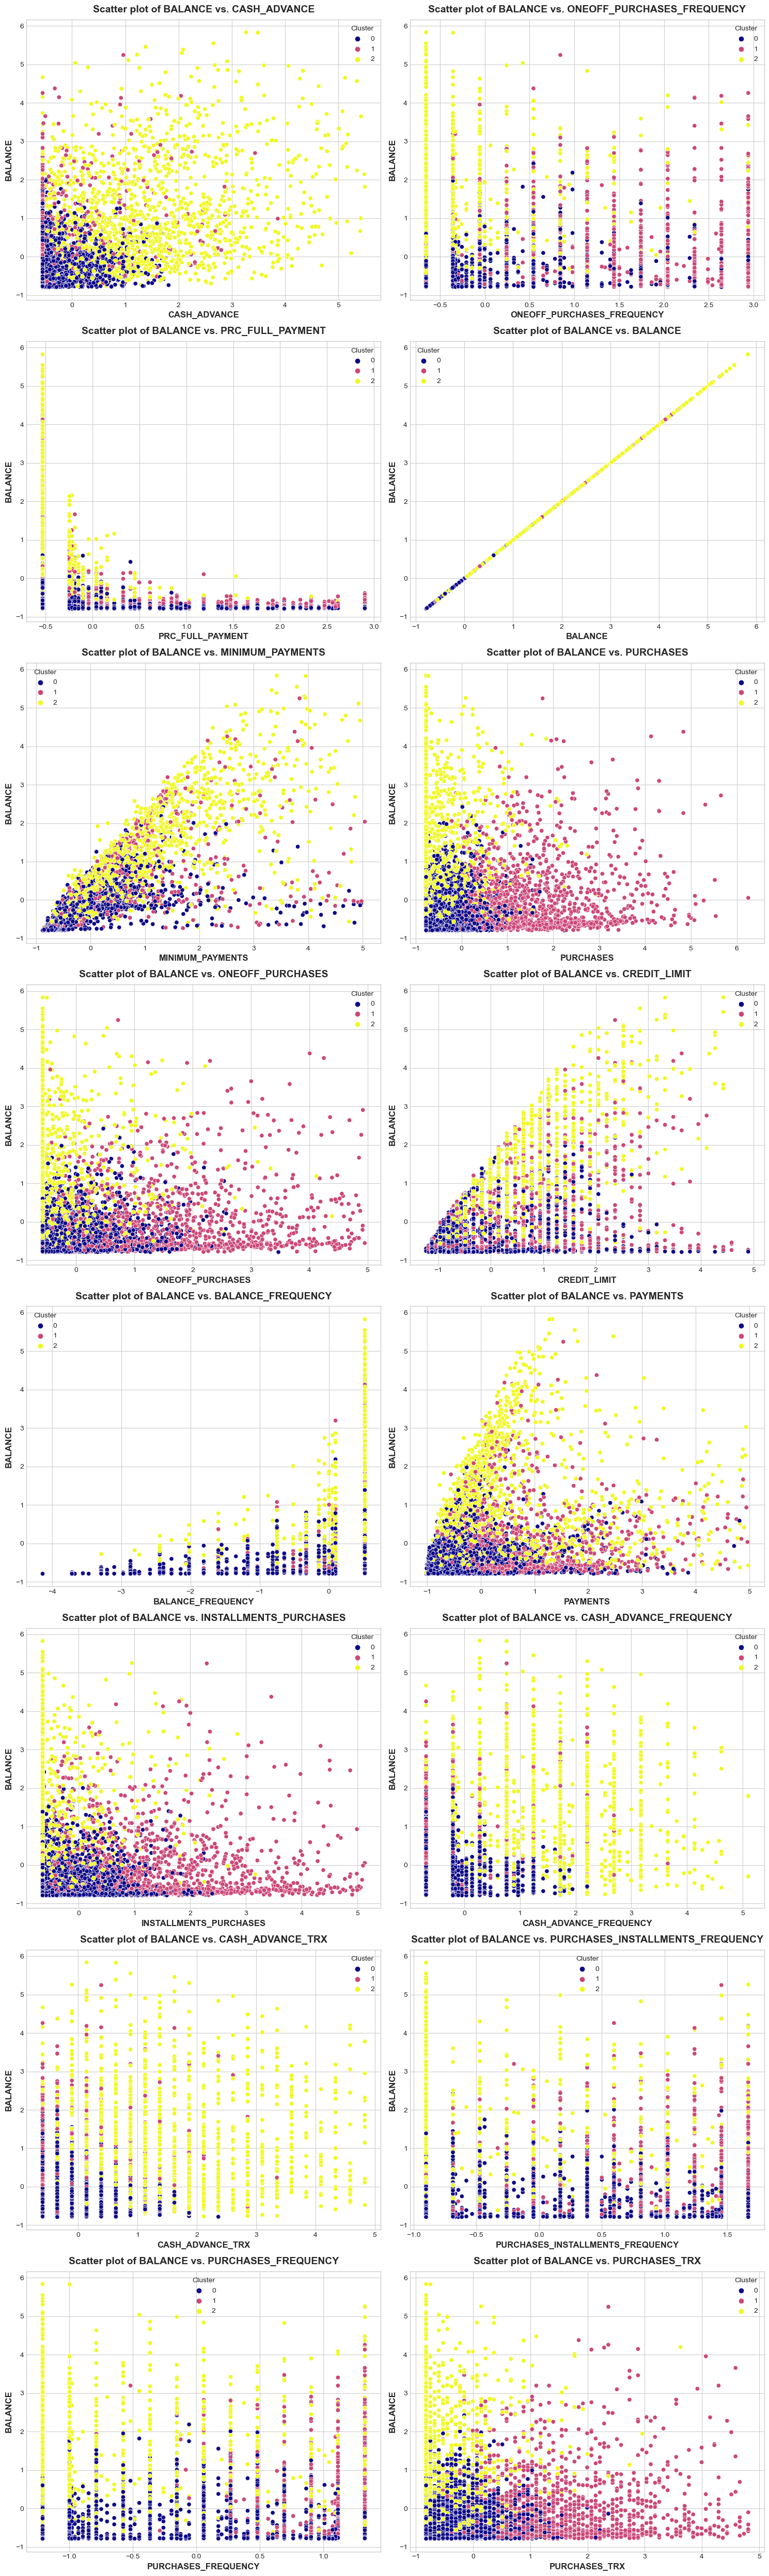

In [26]:
plot_scatter(df,num);

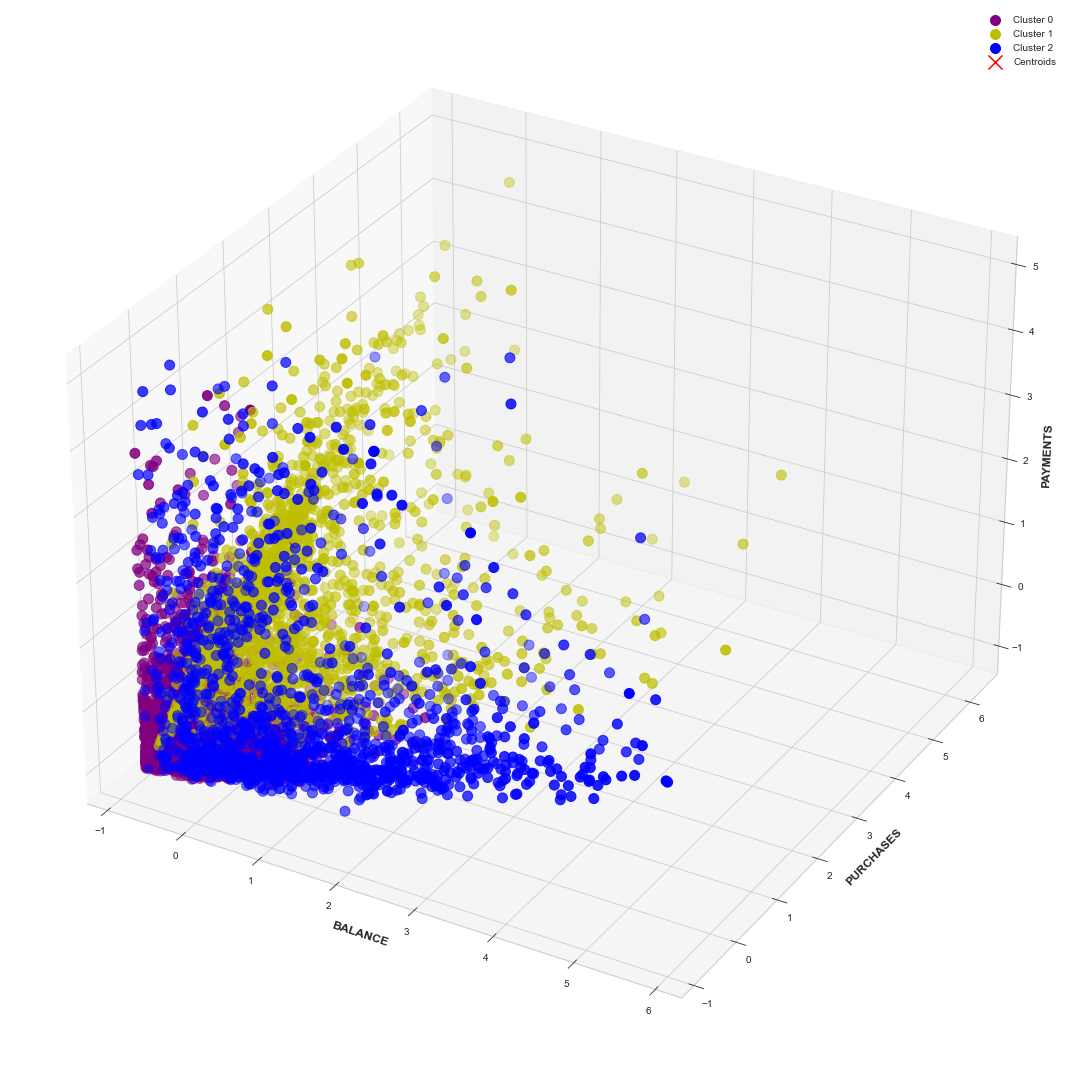

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter points for each cluster, adjust colors and labels
ax.scatter(df[df['Cluster'] == 0]['BALANCE'], df[df['Cluster'] == 0]['PURCHASES'], df[df['Cluster'] == 0]['PAYMENTS'], s=100, c='purple', label='Cluster 0')
ax.scatter(df[df['Cluster'] == 1]['BALANCE'], df[df['Cluster'] == 1]['PURCHASES'], df[df['Cluster'] == 1]['PAYMENTS'], s=100, c='y', label='Cluster 1')
ax.scatter(df[df['Cluster'] == 2]['BALANCE'], df[df['Cluster'] == 2]['PURCHASES'], df[df['Cluster'] == 2]['PAYMENTS'], s=100, c='b', label='Cluster 2')

# Plot centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='x', label='Centroids')

# Add labels and legend
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('PAYMENTS')
plt.legend(loc='upper right')

# Show the 3D scatterplot
plt.show()

##### APPLY PRINCIPAL COMPONENT ANALYSIS 

In [28]:
df= df.reset_index()

In [29]:
y = df["Cluster"]
X = df.drop(["Cluster"], axis=1)

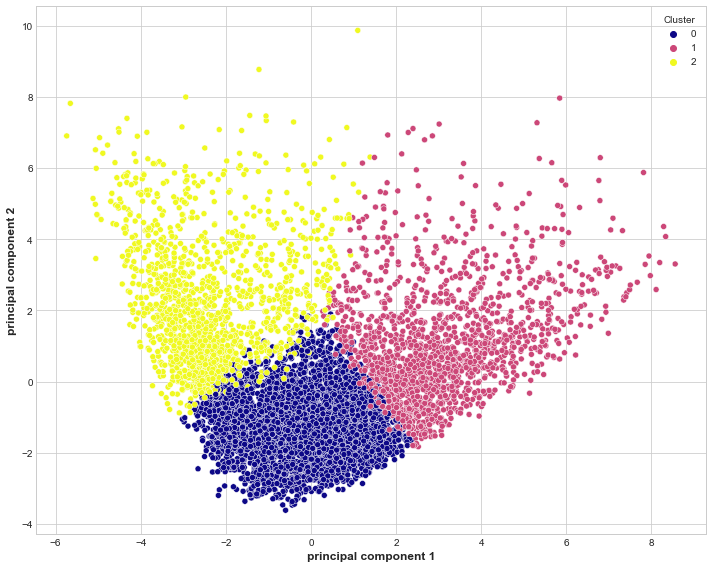

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pca_fit, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
pca_df['Cluster'] = final_df['Cluster']
plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_df, x='principal component 1', y='principal component 2', hue='Cluster', palette='plasma')
plt.show()

## Hierarchical  Clustering

In [31]:

from sklearn.cluster import AgglomerativeClustering


hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_labels=hc.fit_predict(final_df)

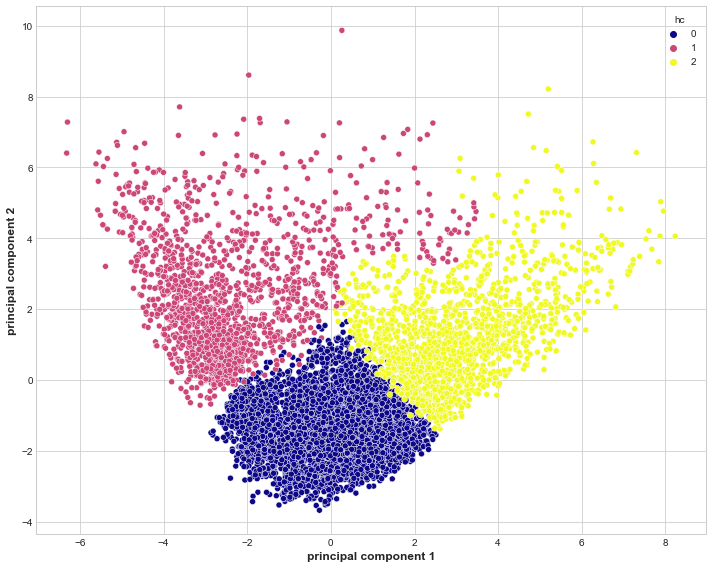

In [32]:
df_hc = pd.concat([final_df, pd.DataFrame({'hc':hc_labels})], axis = 1)
df_hc.head()

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(final_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['hc'] = df_hc['hc']
plt.figure(figsize=(10,8))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='hc', palette='plasma')
plt.show()

## Results

In [35]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
print("Silhouette Score (KMeans): ", metrics.silhouette_score(final_df, labels))
print("Calinski-Harabasz Index (KMeans): ", metrics.calinski_harabasz_score(final_df, labels))
print("Davies-Bouldin Index (KMeans): ", metrics.davies_bouldin_score(final_df, labels))
print("  ")
print("_"*70)
print("  ")
print("Silhouette Score (Hierarchical Clustering):", silhouette_score(final_df, hc.labels_))
print("Calinski-Harabasz Index (Hierarchical Clustering):", calinski_harabasz_score(final_df, hc.labels_))
print("Davies-Bouldin Index (Hierarchical Clustering):", davies_bouldin_score(final_df, hc.labels_))


Silhouette Score (KMeans):  0.4685672589385614
Calinski-Harabasz Index (KMeans):  6757.789267507811
Davies-Bouldin Index (KMeans):  0.7675086978541632
  
______________________________________________________________________
  
Silhouette Score (Hierarchical Clustering): 0.45867775187747484
Calinski-Harabasz Index (Hierarchical Clustering): 6280.020265492649
Davies-Bouldin Index (Hierarchical Clustering): 0.7857263213462878


# **Conclusion:**
* If emphasizing silhouette score, suggesting better-defined clusters, Hierarchical Clustering might be preferred.
* If focusing on the Calinski-Harabasz Index, indicating cohesive and separated clusters, KMeans appears to perform slightly better.
* The Davies-Bouldin Index favors kmeans Clustering due to its lower value, indicating better cluster quality in terms of separation and compactness.

---
# END
Thank you :)